## Kaggle Data Set - Credit Card Fraud
### The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
## Dataset Information:
    * Number of Instances: 284,807
    * Number of Attributes: 31 (including the class attribute)
    * Attribute Information:
    * Features V1, V2, ... V28 are the principal components obtained with PCA.    
    * The only features which have not been transformed with PCA are 'Time' and 'Amount'.
    * Feature 'Time' contains the seconds elapsed between each transaction and the first 
      transaction in the   dataset.
### Class (class attribute):
    * Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 
      otherwise. 
      1 = Fraud Transaction
      0 = Normal Transaction
### All the remaining details regarding the data set can be found in the below link.
### [CreditCardFraud](https://www.kaggle.com/dalpozz/creditcardfraud/data)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [4]:
#download the data set from  
#https://www.kaggle.com/dalpozz/creditcardfraud/data
# load the data set
data=pd.read_csv("creditcard.csv")

In [5]:
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#how many transactions are fraud 
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#####  **Class label**:
   * label 0 - **Normal transactions** count is  **284315**.
   * label 1 - **Fraud transactions** count is **492**.
   
Clearly it is an **imbalanced dataset**.   

In [8]:
# statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


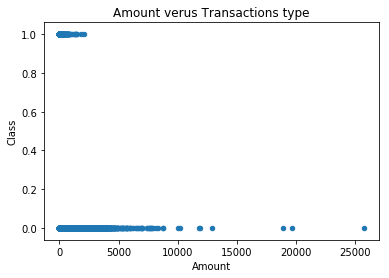

In [9]:
# lets plot plain scatter plot considering Amount and Class
data.plot(kind='scatter', x='Amount', y='Class',title ='Amount verus Transactions type');
plt.show()

### Observation:
 1) We can see from the above Scatter plot that **most of the transaction amounts** are **between 0 to 2500 for both normal and fraud**.

#### Let us check fraud Amount versus normal Amount distrubutions

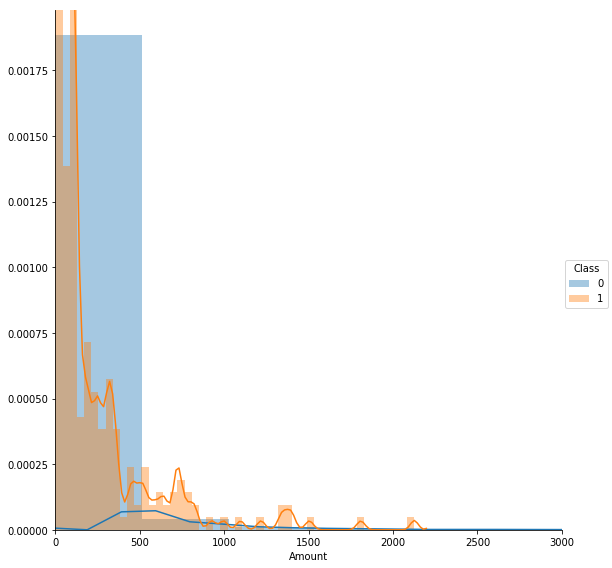

In [10]:
g=sns.FacetGrid(data, hue='Class', size=8)
plot=g.map(sns.distplot,"Amount").add_legend()
g = g.set(xlim=(0,3000))


In [11]:
#Divide the dataset according to the label FraudTransactions and Normal Transactions
# Fraud means Class=1 and Normal means status =0
fraud=data.loc[data["Class"]==1]
normal=data.loc[data["Class"]==0]

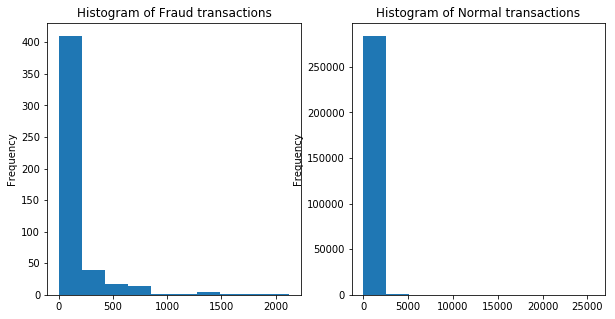

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
fraud.Amount.plot.hist(title="Histogram of Fraud transactions")
plt.subplot(122)
normal.Amount.plot.hist(title="Histogram of Normal transactions")

In [13]:
print("Summary Statistics of fraud transactions:")
fraud.describe().Amount

Summary Statistics of fraud transactions:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
print("Summary Statistics of Normal transactions:")
normal.describe().Amount

Summary Statistics of Normal transactions:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Observation:
From the above plots and Statistics we can see that  **fraud transactions amount on average is higher than normal transactions amount though absolute amount for normal transactions is high.** Based on this **we cannot simply come up with a condition on amount** to detect a fraud transaction.


### Let us Analyze fraud and normal transactions with respect to time - Though each transaction is different just out of curiosity, am checking fraud transactions occurence with respect to time on two days

In [15]:
# DataSet contains two days transactions. 
# Feature 'Time' contains the seconds elapsed between each transaction and the first 
# transaction in the dataset.let us convert time in seconds to hours of a day
dataSubset = data[['Time', 'Amount', 'Class']].copy()


In [16]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def seconds_Hour_Coversion(seconds):
      hours = seconds/(60*60) ## for conversion of seconds to hours.
      if hours>24: 
    ## if it is more than 24 hours then divide it by 2 as max number of hours is 48.
        hours= hours/2 
        return int(hours)
      else:
        return int(hours)

In [17]:
# Save the result in a new column
dataSubset['Hours'] = dataSubset['Time'].apply(seconds_Hour_Coversion)

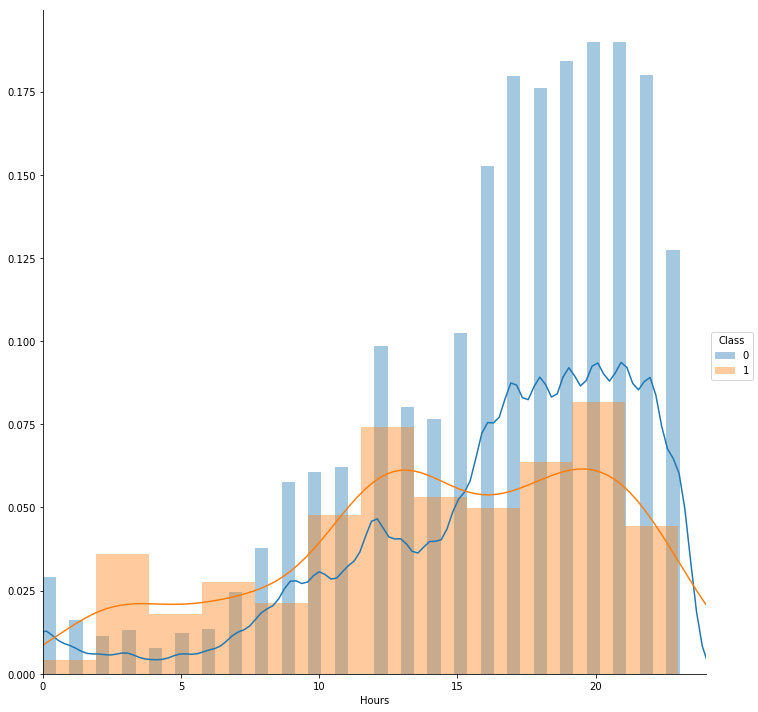

In [18]:
g=sns.FacetGrid(dataSubset, hue='Class', size=10)
plot=g.map(sns.distplot,"Hours").add_legend()
g = g.set(xlim=(0,24))

In [19]:
#Divide the data set according to the label FraudTransactions and Normal Transactions
# Fraud means Class=1 and Normal means status =0
frauddata=dataSubset.loc[data["Class"]==1]
normaldata=dataSubset.loc[data["Class"]==0]

In [20]:
frauddata.describe()

,Time,Amount,Class,Hours
count,492.000000,492.000000,492.0,492.000000
mean,80746.806911,122.211321,1.0,14.313008
std,47835.365138,256.683288,0.0,5.928253
min,406.000000,0.000000,1.0,0.000000
25%,41241.500000,1.000000,1.0,11.000000
50%,75568.500000,9.250000,1.0,14.500000
75%,128483.000000,105.890000,1.0,19.000000
max,170348.000000,2125.870000,1.0,23.000000


### Observation:
1) During the **early hours** i.e at (2 to 3 AM) there are **more fraud transactions when compared with normal transactions** - may be more chance of occuring during that time.

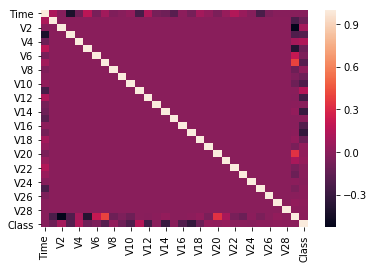

In [21]:
#let us plot a heat map for correlation of the features
sns.heatmap(data.corr())

### Observation:
1) All most all the features are **uncorrelated**.

## Cosine Similarity of Transactions:
####  1)Extract 100 Samples from the dataSet. 
####  2)For every transaction in the sample  top 10 transactions in the dataset which have the lowest similarity(i,j).

In [22]:
data.index.name='TransactionId'
## let us take 100 samples from the dataset using train_test_split without missing 
# class distrubution in the original dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.loc[:, data.columns != 'Class'],\
                data['Class'], test_size=0.00035, random_state=42)
sample = pd.concat([X_test, y_test], axis=1) 
sample.shape

(100, 31)

In [23]:
# Computing the Similarity
similarity=cosine_similarity(sample,data)
similarity

array([[  8.76963363e-03,   6.14303111e-03,   1.14126542e-02, ...,
          9.99964177e-01,   9.99961318e-01,   9.99971038e-01],
       [  1.17462490e-02,   8.32789565e-03,   1.43896665e-02, ...,
          9.99935494e-01,   9.99931633e-01,   9.99944923e-01],
       [  8.72486637e-04,   6.48262596e-04,   3.51361102e-03, ...,
          9.99999879e-01,   9.99999661e-01,   9.99999921e-01],
       ..., 
       [  3.47615604e-04,   2.48996705e-04,   2.98851016e-03, ...,
          9.99999998e-01,   9.99999956e-01,   9.99999587e-01],
       [  7.01971362e-05,   4.64298301e-05,   2.71075987e-03, ...,
          9.99999947e-01,   9.99999999e-01,   9.99999297e-01],
       [  1.01496706e-04,   5.80906821e-05,   2.74214708e-03, ...,
          9.99999954e-01,   9.99999996e-01,   9.99999331e-01]])

In [24]:
# rename the index and name it as TransactionId
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
TransactionId,,,,,,,,,,,,,,,,,,,,,
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [58]:
def printResult(transaction1,first10pairs,data,dict):
     x=transaction1[1][30]
     y=transaction1[0]
     s1='For the transaction id = '+ '{:d}'.format(y) + ', and Class = ' + \
        '{0:.5g}'.format(x)
     print (s1 +"\n")   
     print ('Similar transactions are :'+ '\n')
     for k in first10pairs:
        printSimilarity(k,dict[k],data)
     print ('--------------------------------------------------------'+"\n")   
            
def printSimilarity(key,similarity,data):
                  x=key[1] 
                  s=similarity
                  y=key[0] 
                  print ("Class = " + '{0:.5g}'.format(x) + ", Similarity = "+\
                     '{:f}'.format(s)+ ", transactionId = "+'{:d}'.format(y)+"\n")
              

In [59]:
import operator
import itertools
i=-1;
dict={}
for transaction1 in sample.iterrows() :
        i=i+1
        j=0
        for transaction2 in data.iterrows():
            if i is not j:
              #Storing key-transactionid and class as tuple
              # value as similarity in dictionary
              dict[(transaction2[0],transaction2[1][30])] = similarity[i][j]
            j=j+1
                   
        if dict : 
            sorted_dict = sorted(dict, key=dict.__getitem__)[:10]
            printResult(transaction1,sorted_dict,data,dict)
            dict.clear()    
        

For the transaction id = 43428, and Class = 1

Similar transactions are :

Class = 0, Similarity = 0.006143, transactionId = 1

Class = 0, Similarity = 0.011413, transactionId = 2

Class = 0, Similarity = 0.016857, transactionId = 3

Class = 0, Similarity = 0.034422, transactionId = 51

Class = 0, Similarity = 0.035667, transactionId = 164

Class = 0, Similarity = 0.037282, transactionId = 4

Class = 0, Similarity = 0.060354, transactionId = 89

Class = 0, Similarity = 0.077623, transactionId = 20

Class = 0, Similarity = 0.083516, transactionId = 8

Class = 0, Similarity = 0.090706, transactionId = 12

--------------------------------------------------------

For the transaction id = 49906, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.011746, transactionId = 0

Class = 0, Similarity = 0.014390, transactionId = 2

Class = 0, Similarity = 0.019836, transactionId = 3

Class = 0, Similarity = 0.037396, transactionId = 51

Class = 0, Similarity = 0.038641, transacti

For the transaction id = 97650, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000452, transactionId = 1

Class = 0, Similarity = 0.000633, transactionId = 0

Class = 0, Similarity = 0.003274, transactionId = 2

Class = 0, Similarity = 0.008725, transactionId = 3

Class = 0, Similarity = 0.026284, transactionId = 51

Class = 0, Similarity = 0.027530, transactionId = 164

Class = 0, Similarity = 0.029159, transactionId = 4

Class = 0, Similarity = 0.052226, transactionId = 89

Class = 0, Similarity = 0.069507, transactionId = 20

Class = 0, Similarity = 0.075417, transactionId = 8

--------------------------------------------------------

For the transaction id = 158290, and Class = 0

Similar transactions are :

Class = 0, Similarity = -0.000008, transactionId = 1

Class = 0, Similarity = 0.000009, transactionId = 0

Class = 0, Similarity = 0.002649, transactionId = 2

Class = 0, Similarity = 0.008101, transactionId = 3

Class = 0, Similarity = 0.025660, transacti

For the transaction id = 92410, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000981, transactionId = 1

Class = 0, Similarity = 0.001361, transactionId = 0

Class = 0, Similarity = 0.004002, transactionId = 2

Class = 0, Similarity = 0.009452, transactionId = 3

Class = 0, Similarity = 0.027012, transactionId = 51

Class = 0, Similarity = 0.028257, transactionId = 164

Class = 0, Similarity = 0.029885, transactionId = 4

Class = 0, Similarity = 0.052952, transactionId = 89

Class = 0, Similarity = 0.070233, transactionId = 20

Class = 0, Similarity = 0.076140, transactionId = 8

--------------------------------------------------------

For the transaction id = 10828, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000809, transactionId = 1

Class = 0, Similarity = 0.001189, transactionId = 0

Class = 0, Similarity = 0.003829, transactionId = 2

Class = 0, Similarity = 0.009283, transactionId = 3

Class = 0, Similarity = 0.026839, transaction

For the transaction id = 228215, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000403, transactionId = 1

Class = 0, Similarity = 0.000563, transactionId = 0

Class = 0, Similarity = 0.003204, transactionId = 2

Class = 0, Similarity = 0.008656, transactionId = 3

Class = 0, Similarity = 0.026215, transactionId = 51

Class = 0, Similarity = 0.027460, transactionId = 164

Class = 0, Similarity = 0.029089, transactionId = 4

Class = 0, Similarity = 0.052156, transactionId = 89

Class = 0, Similarity = 0.069438, transactionId = 20

Class = 0, Similarity = 0.075347, transactionId = 8

--------------------------------------------------------

For the transaction id = 259706, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000035, transactionId = 1

Class = 0, Similarity = 0.000047, transactionId = 0

Class = 0, Similarity = 0.002688, transactionId = 2

Class = 0, Similarity = 0.008139, transactionId = 3

Class = 0, Similarity = 0.025698, transacti

For the transaction id = 187045, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.002088, transactionId = 1

Class = 0, Similarity = 0.002946, transactionId = 0

Class = 0, Similarity = 0.005588, transactionId = 2

Class = 0, Similarity = 0.011037, transactionId = 3

Class = 0, Similarity = 0.028598, transactionId = 51

Class = 0, Similarity = 0.029843, transactionId = 164

Class = 0, Similarity = 0.031469, transactionId = 4

Class = 0, Similarity = 0.054537, transactionId = 89

Class = 0, Similarity = 0.071815, transactionId = 20

Class = 0, Similarity = 0.077720, transactionId = 8

--------------------------------------------------------

For the transaction id = 149100, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000011, transactionId = 0

Class = 0, Similarity = 0.000018, transactionId = 1

Class = 0, Similarity = 0.002651, transactionId = 2

Class = 0, Similarity = 0.008103, transactionId = 3

Class = 0, Similarity = 0.025662, transacti

For the transaction id = 240146, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.001772, transactionId = 1

Class = 0, Similarity = 0.002509, transactionId = 0

Class = 0, Similarity = 0.005150, transactionId = 2

Class = 0, Similarity = 0.010601, transactionId = 3

Class = 0, Similarity = 0.028160, transactionId = 51

Class = 0, Similarity = 0.029406, transactionId = 164

Class = 0, Similarity = 0.031032, transactionId = 4

Class = 0, Similarity = 0.054100, transactionId = 89

Class = 0, Similarity = 0.071378, transactionId = 20

Class = 0, Similarity = 0.077285, transactionId = 8

--------------------------------------------------------

For the transaction id = 240449, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000050, transactionId = 1

Class = 0, Similarity = 0.000059, transactionId = 0

Class = 0, Similarity = 0.002700, transactionId = 2

Class = 0, Similarity = 0.008151, transactionId = 3

Class = 0, Similarity = 0.025711, transacti

For the transaction id = 228491, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000023, transactionId = 1

Class = 0, Similarity = 0.000040, transactionId = 0

Class = 0, Similarity = 0.002681, transactionId = 2

Class = 0, Similarity = 0.008132, transactionId = 3

Class = 0, Similarity = 0.025691, transactionId = 51

Class = 0, Similarity = 0.026937, transactionId = 164

Class = 0, Similarity = 0.028567, transactionId = 4

Class = 0, Similarity = 0.051634, transactionId = 89

Class = 0, Similarity = 0.068915, transactionId = 20

Class = 0, Similarity = 0.074826, transactionId = 8

--------------------------------------------------------

For the transaction id = 217792, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000843, transactionId = 1

Class = 0, Similarity = 0.001191, transactionId = 0

Class = 0, Similarity = 0.003831, transactionId = 2

Class = 0, Similarity = 0.009282, transactionId = 3

Class = 0, Similarity = 0.026841, transacti

For the transaction id = 208257, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000514, transactionId = 1

Class = 0, Similarity = 0.000737, transactionId = 0

Class = 0, Similarity = 0.003378, transactionId = 2

Class = 0, Similarity = 0.008829, transactionId = 3

Class = 0, Similarity = 0.026388, transactionId = 51

Class = 0, Similarity = 0.027633, transactionId = 164

Class = 0, Similarity = 0.029263, transactionId = 4

Class = 0, Similarity = 0.052329, transactionId = 89

Class = 0, Similarity = 0.069610, transactionId = 20

Class = 0, Similarity = 0.075519, transactionId = 8

--------------------------------------------------------

For the transaction id = 185213, and Class = 0

Similar transactions are :

Class = 0, Similarity = 0.000163, transactionId = 1

Class = 0, Similarity = 0.000229, transactionId = 0

Class = 0, Similarity = 0.002869, transactionId = 2

Class = 0, Similarity = 0.008320, transactionId = 3

Class = 0, Similarity = 0.025880, transacti